<img style="float: left;" src="datas/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>December 1st, 2023</center>

---

# <center><ins>TP Class N°5 - Geometric Transformations</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 7 December 2023, 23h59**.
* The name of the file you upload should be **TP5_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP5_name_surname.zip**.

Defining useful utility functions and basic imports.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import uint8 as u8, pi, uint32 as u32, uint64 as u64, float64 as f64, float32 as f32
from numpy.typing import NDArray
from PIL import Image
from copy import deepcopy
import skimage as sk
import skimage.transform as skt

FIG_SIZE = np.asarray((20, 10))
FIG_SIZE_INV = np.asarray((10, 20))


def imread(path: str, dtype: type = f64, grayscale: bool = False) -> NDArray:
    """
    Load the image at given path into a numpy array
    @param path: path to image (relative to this file)
    @param dtype: if float, returned image will be in the [0, 1] range, else in [0, 255] (defaults to uint8)
    @param grayscale: whether to load image as grayscale or not
    @return: NDArray of shape (m, n, 3) if grayscale is False, else (m, n)
    """
    # img: Image = Image.open(path)
    # if grayscale: img = img.convert('L')
    # out = np.array(img)
    out: NDArray = plt.imread(path)
    if grayscale and len(out.shape) >= 3: out = skimage.color.rgb2gray(out)
    if dtype is None: return out

    img_max = np.max(out)
    is_img_float = img_max <= 1
    is_given_float = np.issubdtype(dtype, np.floating)
    if not is_given_float and is_img_float:
        out = u8(out * 255)
    elif is_given_float and not is_img_float:
        out = f64(out / 255.)
    return out if out.dtype == dtype else out.astype(dtype)


def imshow_gray(data, show=True, axis=True, title=None):
    plt.imshow(data, cmap="gray")
    plt.axis("on" if axis else "off")
    if title: plt.title(title)
    if show: plt.show()


def imshow(data, show=True, axis=True, title=None):
    plt.imshow(data)
    plt.axis("on" if axis else "off")
    if title: plt.title(title)
    if show: plt.show()


def MSE(im1: NDArray[float], im2: NDArray[float]):
    """Ensure that dtype is float for both images before applying!"""
    # return np.sum((im1 - im2) ** 2) / (im1.shape[0] * im1.shape[1])
    return np.mean((im1 - im2) ** 2)


def psnr(im1: NDArray[float], im2: NDArray[float]):
    """Ensure that dtype is float for both images before applying!"""
    return 10 * np.log(img.max(im1) / MSE(im1, im2))


def image_plot(idx: int, data, title=None, col=4, row=1, gray=True, vmax=None):
    plt.subplot(row, col, idx + 1)
    plt.title(title if title else "")
    plt.axis("off")
    plt.imshow(data, cmap="gray" if gray else None, vmin=0, vmax=vmax)
    if idx == (col * row): plt.show()


def bar_plot(idx: int, x, height, title=None, axis="off", col=4, row=1, color=None):
    plt.subplot(row, col, idx + 1)
    plt.title(title if title else "")
    plt.axis(axis)
    plt.bar(x, height, color=color)
    if idx == (col * row): plt.show()


def to_anti_trig(angle, rad=False):
    """Transforms an angle in trigonometric sense (counter-clockwise) to anti-trigonometric sense (clockwise). 
    i.e. 2pi - angle"""
    return 360 - angle if not rad else 2 * pi - angle


**General Advice:**

*When doing image processing and performing operations on pixels, it is a good practice to use float values for pixels with intensity [0,1].
Performing operations on uint8 encoded images can result in integer overflow and thus compute unpredictable values.*

## Exercise 1 : Image rotations

*(2 points)*

Import the RGB image : "mushroom.jpg".

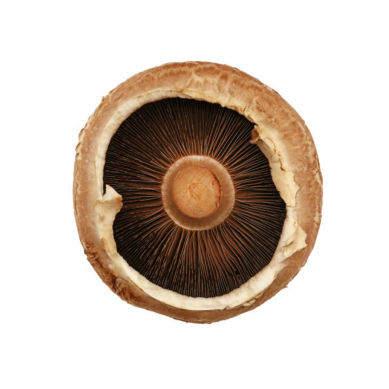

In [2]:
mushroom = imread("datas/mushroom.jpg", dtype=f64)
imshow(mushroom, axis=False)


(a) Using the geometric function *rotate* in the package *skimage.transform*, apply a $30°$ anticlockwise rotation to the image and a $100°$ clockwise rotation. Visualize all three images side-by-side.

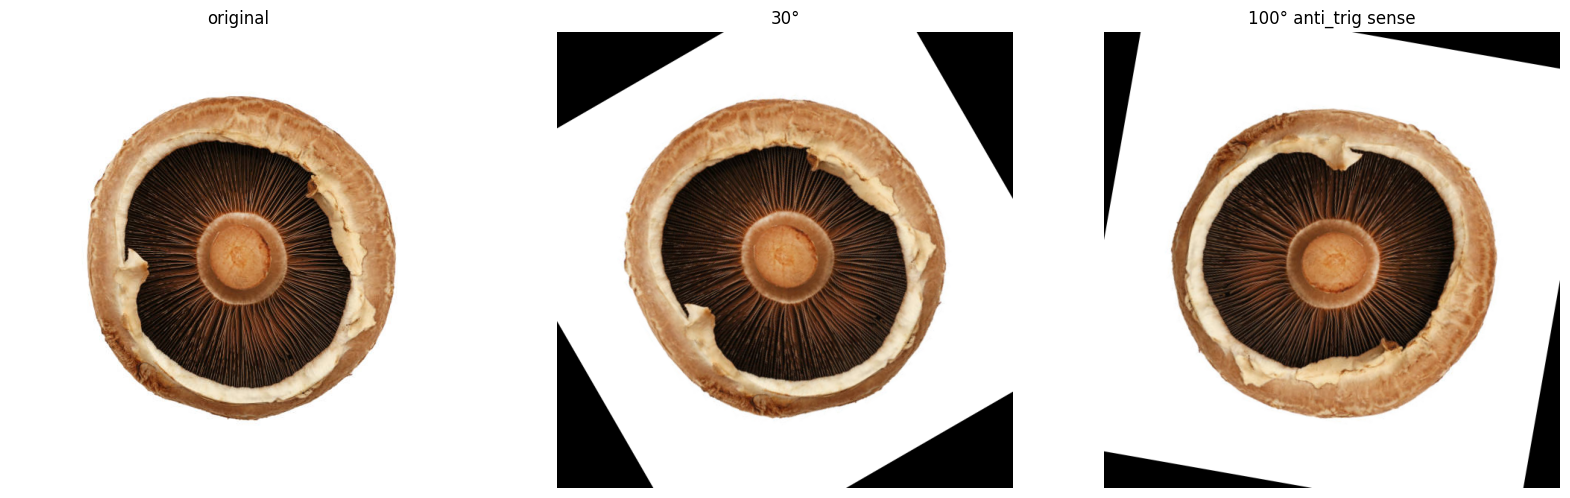

In [3]:
plt.figure(figsize=FIG_SIZE)
mush_30_trig_sense = skt.rotate(mushroom, 30)
mush_100_anti_trig_sense = skt.rotate(mushroom, to_anti_trig(100))
imgs = [mushroom, mush_30_trig_sense, mush_100_anti_trig_sense]

for i, img in enumerate(imgs):
    image_plot(i, img, title=["original", "30°", "100° anti_trig sense"][i], col=3, gray=False)


(b) Explain the meaning of the parameters 'center' and 'resize' of the function. Comment the effects on the border. Explain it on your images.

The center defines the center of rotation, i.e. the "pivot" of the linear rotation application.
The resize parameter defines whether the image should be resized to fit the rotated image, i.e. if edges outside the frame should be cropped or not.

(c) Starting with the original image :

* Apply a rotation of 10 ° to the image and repeat this operation 36 times (this will perform a full 360 ° rotation). Try different parameters ’order’ (=0,1,2,3). Visualize the original image and the results side-by-side.

* Compute MSE between the original image and the various results you obtained. **Hint :** Pay attention to the pixels you apply your MSE measure to, you may want to use a mask.

* What is the effect of the parameter 'order' ? How does it work ?

Giving that displaying 36 images for 4 orders would result in a very long and unreadable plot of 144 images, we will vary the order at random and display only 36 images.

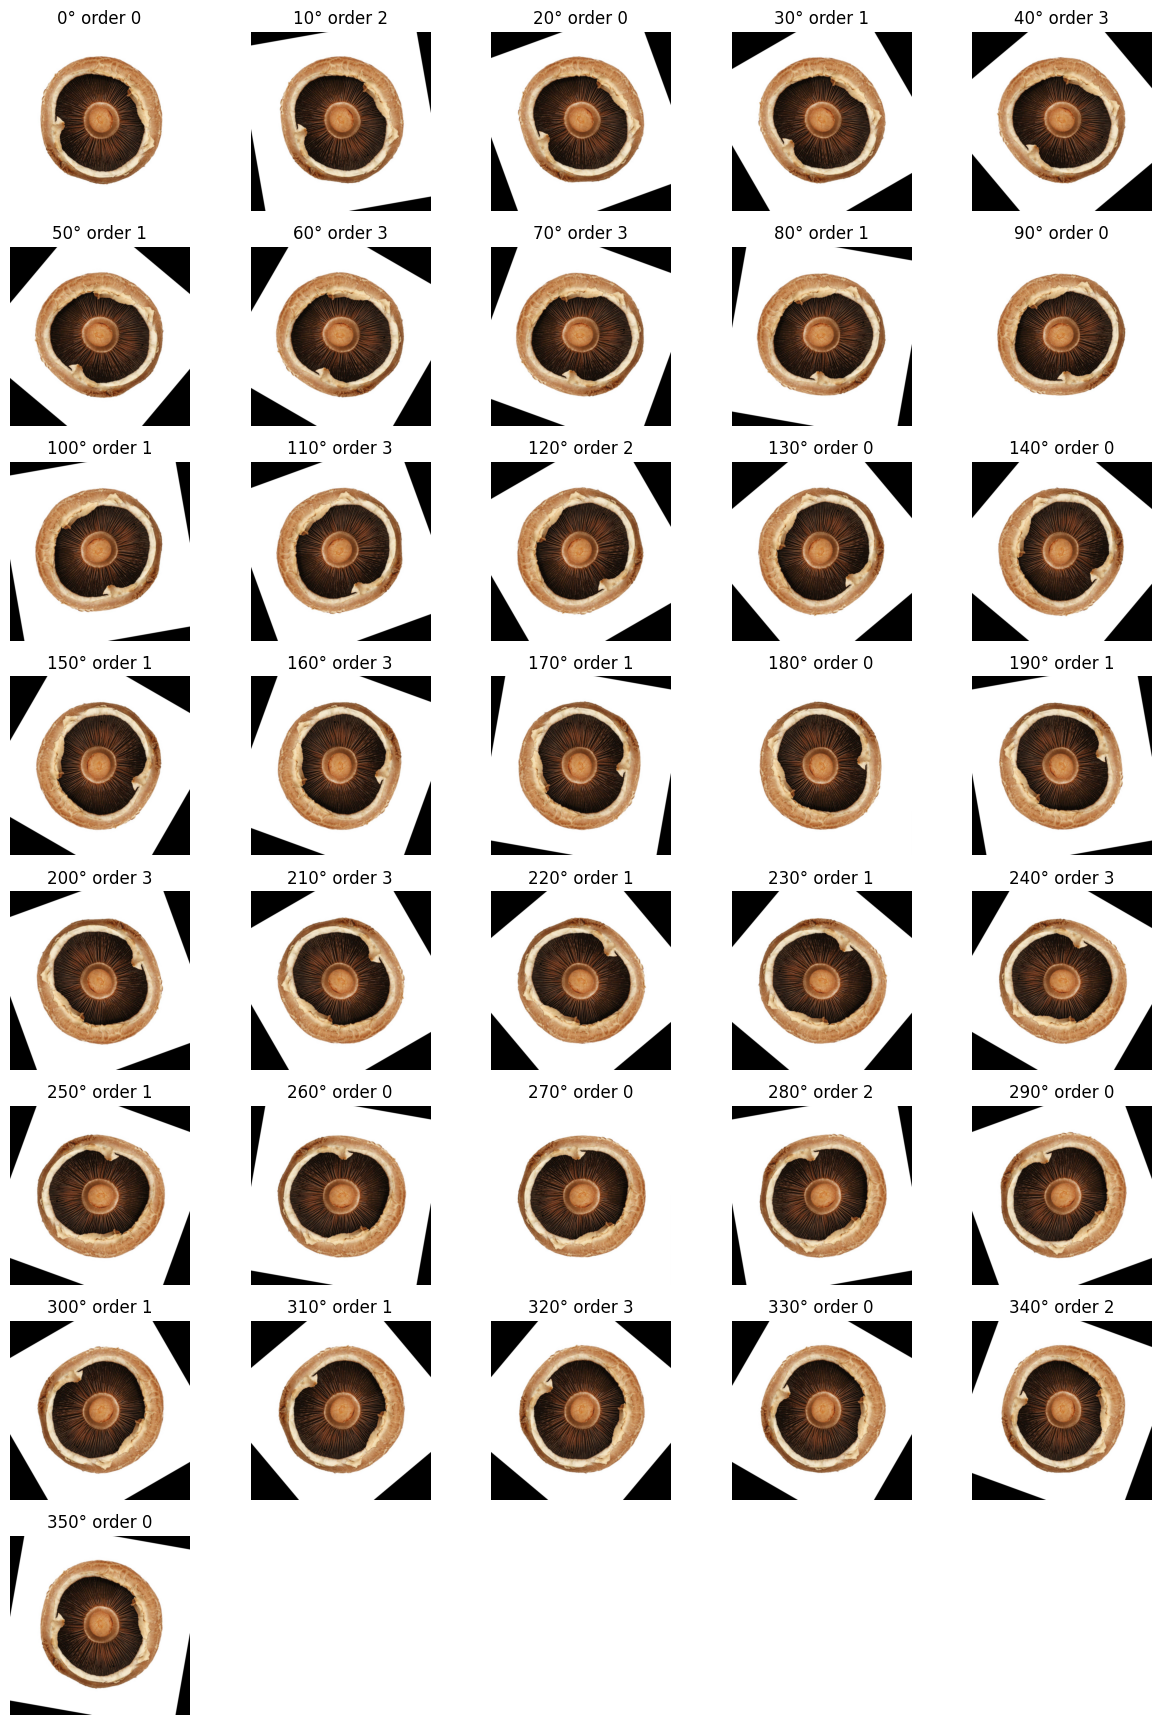

In [24]:
# rotated_list = []
#for order in (0, 1, 2, 3):
rotated = mushroom
# for _ in range(36):
#     rotated = skt.rotate(rotated, 10)
# rotated_list.append(rotated)
rotated_list = [skt.rotate(mushroom, 10 * i) for i in range(36)]
plt.figure(figsize=(15, 100))
row_nb = len(rotated_list)
# col_nb = le
for i, img in enumerate(rotated_list):
    order = np.random.randint(0, 4)
    image_plot(i, img, title=f"{10 * i}° order {order}", col=5, row=row_nb, gray=False)

<br/>

## Exercise 2 : QR code reading
*(2 points)*

In this exercise, you will implement a simple QR code reader based on the image *QR_code_persp.jpg*

(a) Start by loading the image and convert it to grayscale. Visualize it. Locate the four corners of the QR code in pixel coordinates.

(b) You now want to apply a projective transform to your QR code to have it squared and well-aligned.
To do this, you will use the class *ProjectiveTransform()* in the package *skimage.transform* (see an example [here](https://scikit-image.org/docs/dev/auto_examples/transform/plot_geometric.html#sphx-glr-auto-examples-transform-plot-geometric-py)).

* Use the method *estimate()* with a source shape $[[0, 0], [0, 610], [610, 610], [610, 0]]$
* Visualize the projective matrix which is stored in the params attribute of your ProjectiveTransform() object.
* Explain the meaning of the coefficients of this matrix.

(c) Apply the projective transform to your image

* Use the function *warp()* from *skimage.transform* with you ProjectiveTransform object as argument.
* Visualize the transformed image.

(d) What further steps would you consider in order to program a QR code reader ?

-- your answer --

## Exercise 3 : Nearest interpolation
*(2 points)*

In this exercise, you will write a program that performs rescaling of images using nearest interpolation.

(a) Load the image 'lena.png' and convert it to grayscale. Perform a downsampling, taking one pixel every 3 horizontally and vertically.

(b) Write a function that performs resizing using the nearest interpolation and apply it to the downsampled image.

In [5]:
def resize_ni(img, output_shape):
    """
    Changes the shape of the input image to match the output_shape

    Parameters
    ----------
    img : numpy array
        The input grayscale image

    output_shape : numpy array
        A couple of integers (x,y) giving the shape of the output image.

    Outputs
    ------
    resized : numpy array
        The image after the resizing algorithm. It should have shape output_shape.
    """

    return resized

*Hint :* You may want to use *np.round()* to find the nearest-neighbouring point. Try not to use loops on pixels as this is veeeery slow.

(c) Apply the function *resize()* from *skimage.transform* with parameter 'order'=0. Visualize all three images (original, resize_ni and resize) side-by-side. Compute MSE between the original and the upscaled images. Comment your results.